# Graph and mapping libraries in Python

Examples of graph and mapping libraries in Python:

| Library     | Description |
| --- | --- | 
| [networkx](https://networkx.org/) | Python library for studying graphs and networks. | 
| [osmnx](https://osmnx.readthedocs.io/en/stable/)|Python package to download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap.|
| [GeoPandas](https://geopandas.org/en/stable/)| Open source project to make working with geospatial data in python easier.|
| [contextily](https://contextily.readthedocs.io/en/latest/)|  Python 3 (3.7 and above) package to retrieve tile maps from the internet.|
| [folium](https://python-visualization.github.io/folium/)| for interactive geographic visualizations.|
| [leafmap](https://leafmap.org//)| A Python package for geospatial analysis and interactive mapping in a Jupyter environment.|
| [pyrosm](https://pyrosm.readthedocs.io/en/latest/)| Python library for reading OpenStreetMap from Protocolbuffer Binary Format -files (*.osm.pbf) into Geopandas GeoDataFrames. |
| [Pandana](https://udst.github.io/pandana/)| Python library for network analysis that uses contraction hierarchies to calculate super-fast travel accessibility metrics and shortest paths.|
| [OSMPythonTools](https://github.com/mocnik-science/osm-python-tools)| is a well-written package to query OSM services.|
| [Open layers](https://openlayers.org/)| makes it easy to put a dynamic map in any web page.|
| [Plotly Dash](https://dash.plotly.com/)| is a low-code framework for rapidly building interactive data apps in Python.|

## networkx

This is one of the pillars of Python programming and scientific computing, besides `numpy` and `scipy`. Its main and only goal is supporting graph data structures and the associated algorithms like shortest path and networks flow and optimization. `osmnx` returns the map as `networkx` network so it is possible to use all the library's functions on the maps obtained from OSM. `networkx` has books written explaining its API's and we wholeheartedly recommend [Complex Network Analysis in Python: Recognize - Construct - Visualize - Analyze - Interpret](https://www.amazon.com/Complex-Network-Analysis-Python-Recognize/dp/1680502697) if you want to dive into it. Information about `networkx` is also available [here](https://networkx.github.io/). 

`networkx` has a monopoly over the field of network analysis for many years now, but the scalability of `networkx` may be an issue. If your network has tens of millions of nodes, it can get really ugly because `networkx` is still just a `python` library, and `python` can't handle these millions of nodes and will run out of memory, and give you a segmentation fault.

In [ ]:
# !pip install networkx[default]

c:\Users\Alaa\.conda\envs\ox\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The route of the salesman is: [0, 10, 7, 2, 6, 1, 15, 14, 5, 17, 4, 9, 12, 18, 3, 19, 16, 8, 11, 13, 0]


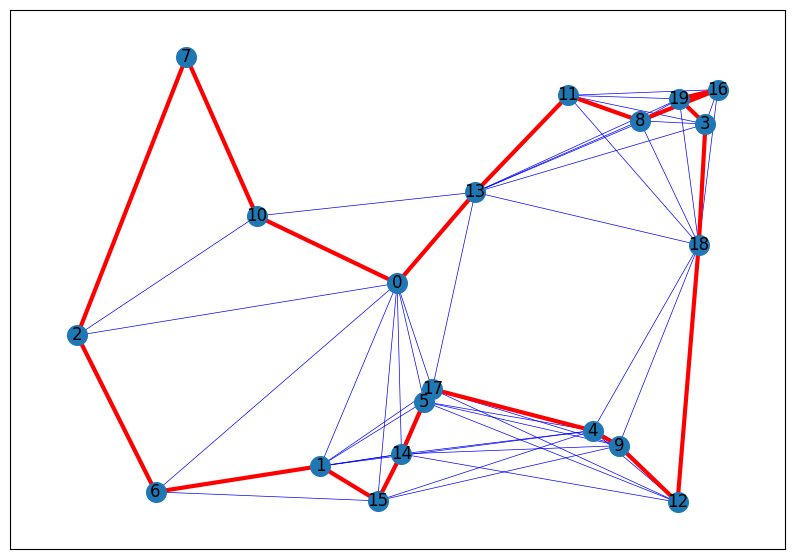

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.approximation as nx_app
import math

plt.figure(figsize=(10, 7))

# Create a random geometric graph with 20 nodes
G = nx.random_geometric_graph(20, radius=0.4, seed=4)
pos = nx.get_node_attributes(G, "pos")

# Depot should be at (0,0)
pos[0] = (0.5, 0.5)

# Create an independent shallow copy of the graph and attributes
H = G.copy()

# Calculating the distances between the nodes as edge's weight.
for i in range(len(pos)):
    for j in range(i + 1, len(pos)):
        dist = math.hypot(pos[i][0] - pos[j][0], pos[i][1] - pos[j][1]) #square root of the sum of squares
        dist = dist
        G.add_edge(i, j, weight=dist)

# solve tsp using Christofides algorithm 
cycle = nx_app.christofides(G, weight="weight")
edge_list = list(nx.utils.pairwise(cycle))

# Draw closest edges on each node only
nx.draw_networkx_edges(H, pos, edge_color="blue", width=0.5)

# Draw the route
nx.draw_networkx(
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)

print("The route of the salesman is:", cycle)
plt.show()
# plt.savefig('A1_F01_Christofides.png', format='png', dpi=300)

## osmnx

This library was developed to ease the process of retrieving and manipulating the data from OpenStreetMap, and to make it easier to be interpolated into Python applications. It offers the ability to download the data (filtered) from OSM and returns the network as `networkx` graph data structure. The library is too complicated to be explained fully in a README file, but you can check the [official website](https://osmnx.readthedocs.io/en/stable/) and follow Professor Boeing's website as he posts regularly on recent updates and trends about osmnx and the field in general.

In [ ]:
# !conda create -n ox -c conda-forge --strict-channel-priority osmnx

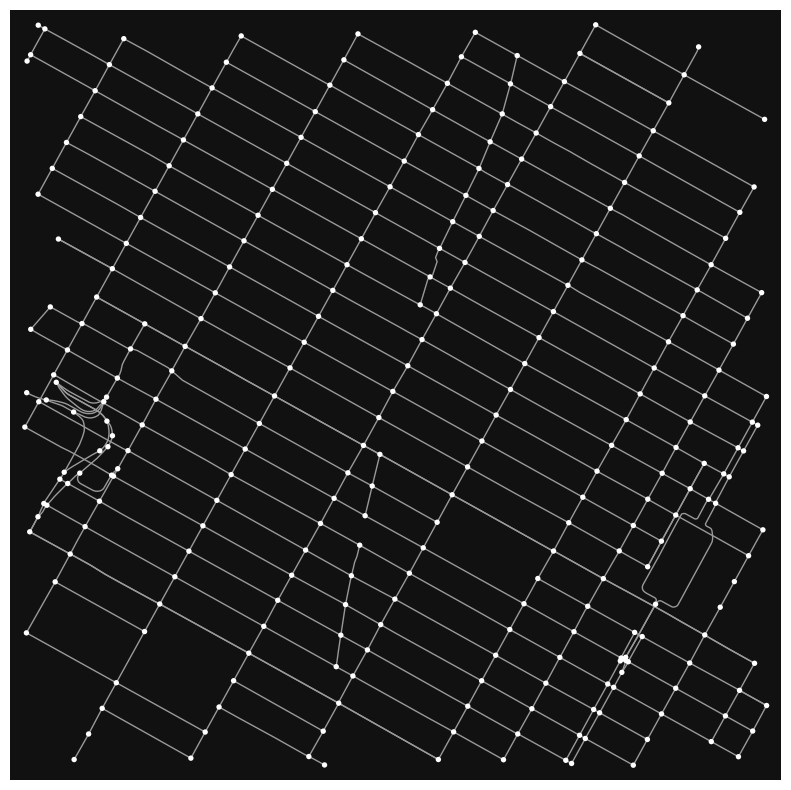

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [2]:
import osmnx as ox

place_name = "Times Square, NY"


# networkx graph of the named place
graph = ox.graph_from_address(place_name, network_type='drive')

# Plot the graphs
ox.plot_graph(graph,figsize=(10,10), save=True, filepath='A1_F02_TimesSquare.png')

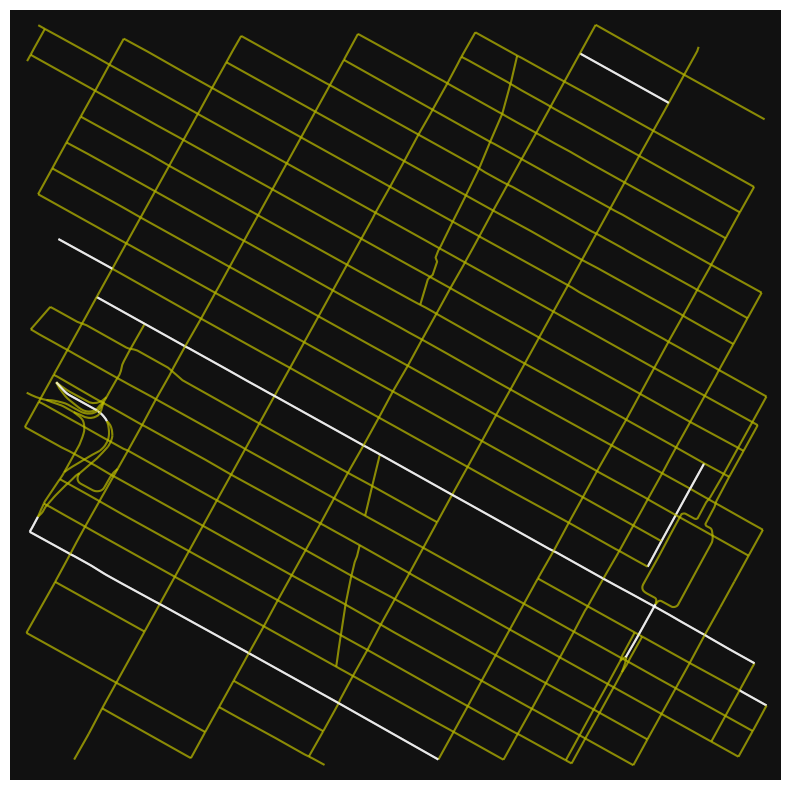

In [3]:
# highlight all one-way edges in Time Square street network
ec = ['y' if data['oneway'] else 'w' for u, v, key, data in graph.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(graph, figsize=(10,10), node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

In [4]:
# type of the graph
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [5]:
# extract the nodes and the edges of the graph
nodes, edges = ox.graph_to_gdfs(graph)

#print first 5 nodes
nodes.head(5)

y          x  street_count          highway  \
osmid                                                           
42423836  40.759388 -73.996954             3              NaN   
42423885  40.757743 -73.996846             4  traffic_signals   
42424789  40.757665 -73.994811             4  traffic_signals   
42427764  40.763926 -73.974136             3  traffic_signals   
42427812  40.749054 -73.995730             4  traffic_signals   

                            geometry  
osmid                                 
42423836  POINT (-73.99695 40.75939)  
42423885  POINT (-73.99685 40.75774)  
42424789  POINT (-73.99481 40.75767)  
42427764  POINT (-73.97414 40.76393)  
42427812  POINT (-73.99573 40.74905)

In [6]:
#print first 5 edges
edges.head(5)

osmid  oneway   lanes  \
u        v          key                                             
42423836 42446506   0                     5669227    True       2   
42423885 42446504   0    [1041012064, 1041012063]    True  [5, 6]   
42424789 42434434   0                    46492638    True       5   
         42444991   0      [847002232, 273895450]    True       3   
42427812 4443775464 0                  1027181003    True       4   

                                     name      highway maxspeed  reversed  \
u        v          key                                                     
42423836 42446506   0       Galvin Avenue    secondary   25 mph     False   
42423885 42446504   0         10th Avenue      primary   25 mph     False   
42424789 42434434   0         Dyer Avenue      primary      NaN     False   
         42444991   0    West 40th Street  residential      NaN     False   
42427812 4443775464 0          8th Avenue    secondary   25 mph     False   

                          length  \
u        v          key            
42423836 42446506   0     79.950   
42423885 42446504   0     76.586   
42424789 42434434   0     86.701   
         42444991   0    118.429   
42427812 4443775464 0     78.073   

                                                                  geometry  \
u        v          key                                                      
42423836 42446506   0    LINESTRING (-73.99695 40.75939, -73.99701 40.7...   
42423885 42446504   0    LINESTRING (-73.99685 40.75774, -73.99680 40.7...   
42424789 42434434   0    LINESTRING (-73.99481 40.75767, -73.99478 40.7...   
         42444991   0    LINESTRING (-73.99481 40.75767, -73.99469 40.7...   
42427812 4443775464 0    LINESTRING (-73.99573 40.74905, -73.99569 40.7...   

                           width access bridge tunnel  ref  
u        v          key                                     
42423836 42446506   0        NaN    NaN    NaN    NaN  NaN  
42423885 42446504   0    69.6 ft    NaN    NaN    NaN  NaN  
42424789 42434434   0        NaN    NaN    NaN    NaN  NaN  
         42444991   0        NaN    NaN    NaN    NaN  NaN  
42427812 4443775464 0        NaN    NaN    NaN    NaN  NaN

In [7]:
# examine each individual node or edge.
list(graph.nodes(data=True))[1]

(42423885,
 {'y': 40.7577433,
  'x': -73.9968456,
  'highway': 'traffic_signals',
  'street_count': 4})

In [8]:
# Rendering the 1st edge
list(graph.edges(data=True))[0]

(42423836,
 42446506,
 {'osmid': 5669227,
  'oneway': True,
  'lanes': '2',
  'name': 'Galvin Avenue',
  'highway': 'secondary',
  'maxspeed': '25 mph',
  'reversed': False,
  'length': 79.95,
  'geometry': <shapely.geometry.linestring.LineString at 0x2493d4b1ab0>})

In [9]:
print(edges['highway'].value_counts())

secondary                      214
residential                    121
primary                        109
unclassified                    17
motorway_link                   12
tertiary                        10
motorway                         6
living_street                    3
trunk                            2
[residential, unclassified]      1
[primary, motorway_link]         1
Name: highway, dtype: int64


In [10]:
# more statistics
ox.basic_stats(graph)

{'n': 272,
 'm': 496,
 'k_avg': 3.6470588235294117,
 'edge_length_total': 67737.19300000004,
 'edge_length_avg': 136.56692137096783,
 'streets_per_node_avg': 3.8345588235294117,
 'streets_per_node_counts': {0: 0, 1: 1, 2: 2, 3: 40, 4: 227, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.003676470588235294,
  2: 0.007352941176470588,
  3: 0.14705882352941177,
  4: 0.8345588235294118,
  5: 0.007352941176470588},
 'intersection_count': 271,
 'street_length_total': 63228.162000000055,
 'street_segment_count': 471,
 'street_length_avg': 134.24238216560522,
 'circuity_avg': 1.005480459182443,
 'self_loop_proportion': 0.0}

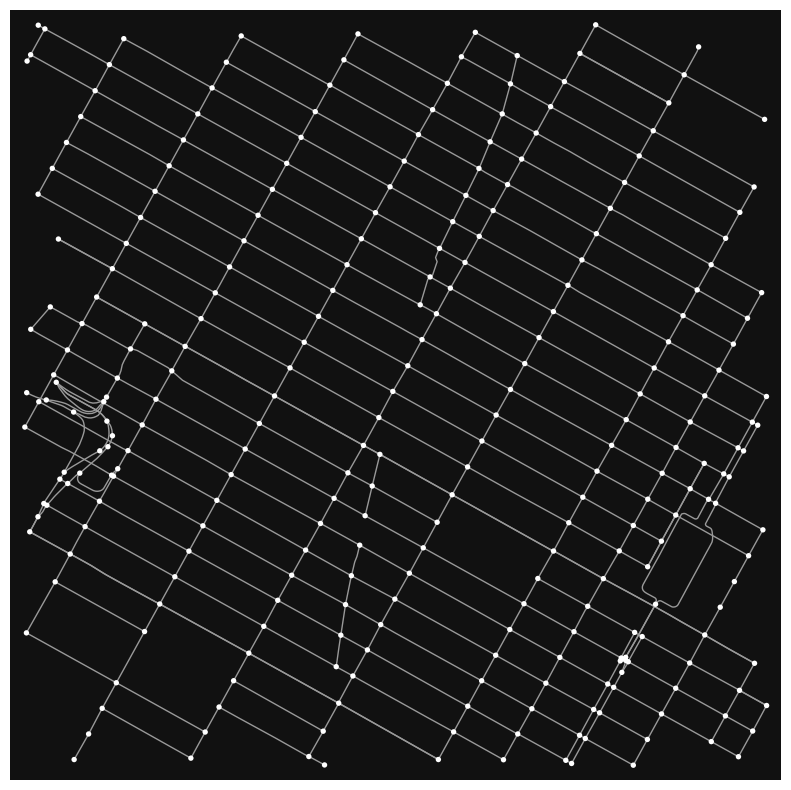

(<Figure size 1000x1000 with 1 Axes>, <AxesSubplot: >)

In [11]:
# GeoDataFrame to MultiDiGraph
new_graph = ox.graph_from_gdfs(nodes,edges)
ox.plot_graph(new_graph,figsize=(10,10))

In [12]:
# # save street network as PNG
# ox.plot_graph(graph, figsize=(10,10), show=False, save=True, close=True, filepath='./data/TimesSquare.png')

# # save street network as SVG
# ox.plot_graph(graph, figsize=(10,10), show=False, save=True, close=True, filepath='./data/TimesSquare.svg')

# # save graph to disk as .osm xml file
# ox.save_graph_xml(graph, filepath='./data/TimesSquare.osm')

# # save street network as GeoPackage to work with in GIS
# ox.save_graph_geopackage(graph, filepath='./data/TimesSquare.gpkg')

# # save street network as GraphML file to work with later in OSMnx or networkx or gephi
# ox.save_graphml(graph, filepath='./data/TimesSquare.graphml')

# # save graph as a shapefile
# ox.save_graph_shapefile(graph, filepath='./data/TimesSquare')

## GeoPandas

[GeoPandas](https://geopandas.org/) is an extension to pandas that handles geospatial data by extending the datatypes of pandas, and the ability to query and manipulate spatial data. Alternatively, you would need to deal with [spatial databases](https://en.wikipedia.org/wiki/Spatial_database) for these operations, like how to properly and efficiently represent polygons and curved lines and query them without too much overhead (for database folks, the indexing of spatial data is different than normal data).

In [ ]:
# !pip install geopandas

In [13]:
import geopandas as gpd
import requests
import os

# Define the base URL for raw files
base_url = "https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/05766c64c5e83dcd6788cc4415b462e2f82e0ccf/Appendix%20B/data/OntarioHealth/"

# Files associated with the shapefile
files = ["Ontario_Health_Regions.shp", "Ontario_Health_Regions.shx", "Ontario_Health_Regions.dbf", "Ontario_Health_Regions.prj"]

# Temporary download each file
for file in files:
    response = requests.get(base_url + file)
    with open(file, 'wb') as f:
        f.write(response.content)

# Read the shapefile with geopandas
ontario =  gpd.read_file("Ontario_Health_Regions.shp")

# Cleanup: Remove downloaded files
for file in files:
    os.remove(file)

print(ontario.head())

     Shape_Leng    Shape_Area   REGION REGION_ID  \
0  4.845977e+06  1.089122e+11     East        04   
1  3.211510e+07  2.232211e+12    North        05   
2  4.860262e+06  7.543033e+10     West        01   
3  2.755817e+06  3.189867e+10  Central        02   
4  2.196396e+05  3.715020e+08  Toronto        03   

                                            geometry  
0  MULTIPOLYGON (((-8631925.914 5449844.839, -863...  
1  MULTIPOLYGON (((-8943097.220 5627248.576, -894...  
2  MULTIPOLYGON (((-9204865.114 5113839.368, -920...  
3  MULTIPOLYGON (((-8872905.739 5371938.215, -887...  
4  MULTIPOLYGON (((-8839514.979 5425932.689, -883...  


<AxesSubplot: >

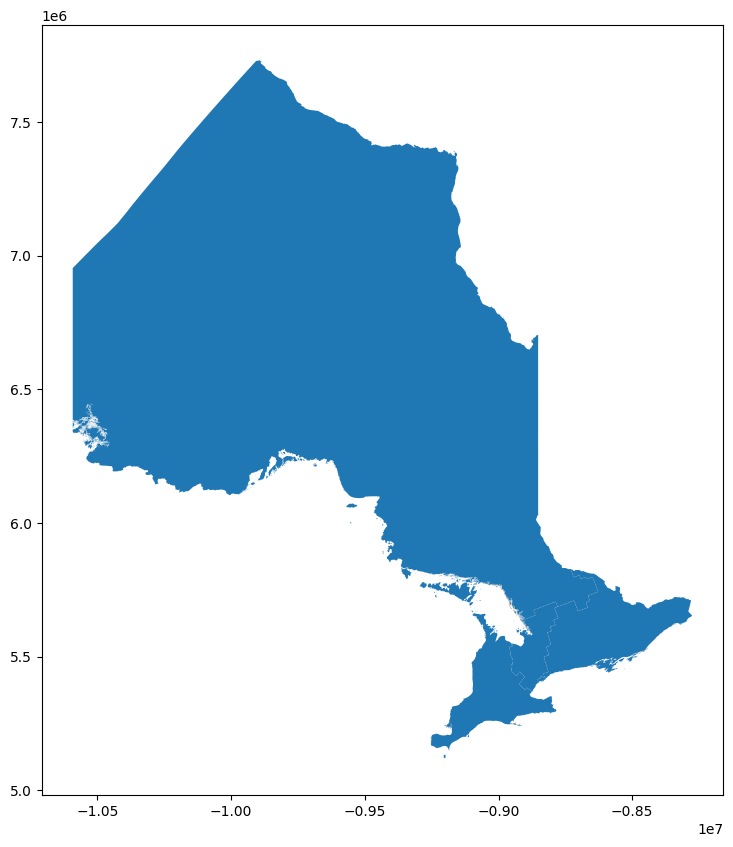

In [15]:
ontario.plot(figsize=(10,10))

Text(0.5, 1.0, 'WGS84 (lat/lon)')

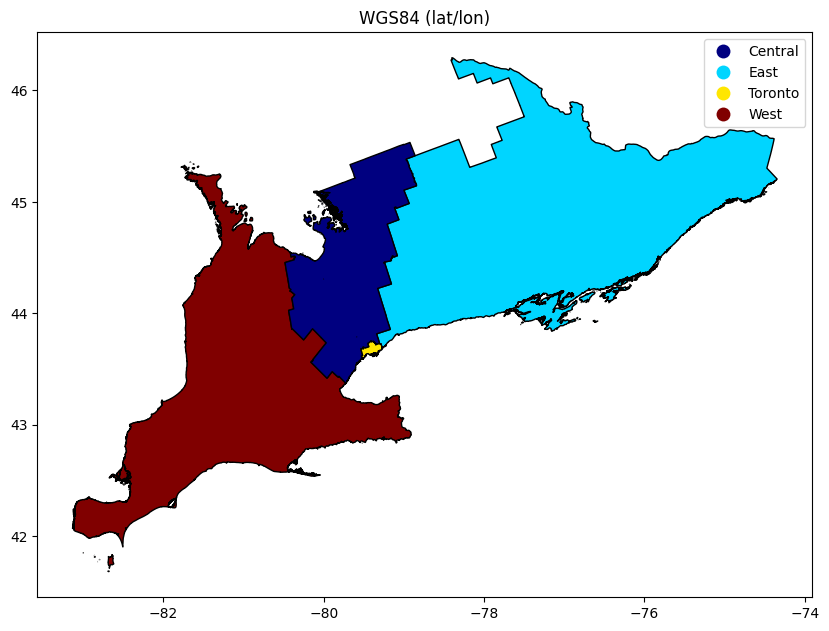

In [16]:
ontario = ontario.to_crs('EPSG:4326')
ontario = ontario[(ontario.REGION != "North")] # exclude Northern Ontario
ax=ontario.plot(cmap='jet', edgecolor='black', column='REGION', figsize=(10,10), legend=True)
ax.set_title('WGS84 (lat/lon)')

## contextily

In [ ]:
# !pip install contextily

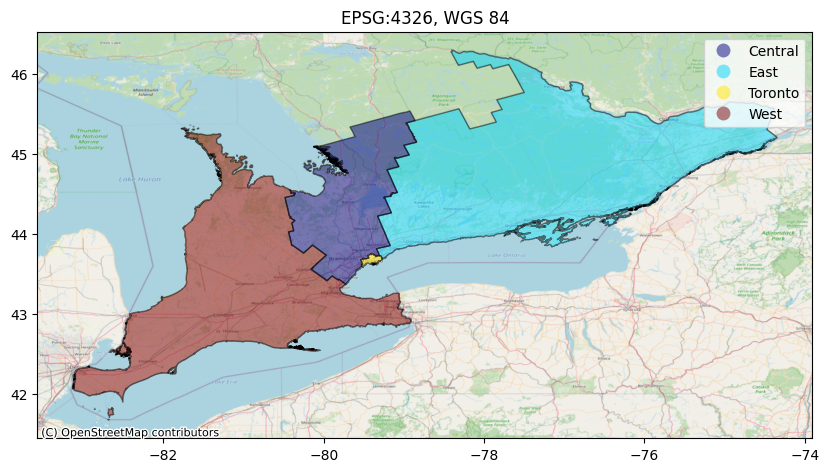

In [17]:
import contextily as ctx

ax=ontario.plot(cmap='jet', edgecolor='black', column='REGION', alpha=0.5, legend=True, figsize=(10,10))
ax.set_title("EPSG:4326, WGS 84")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=ontario.crs.to_string())

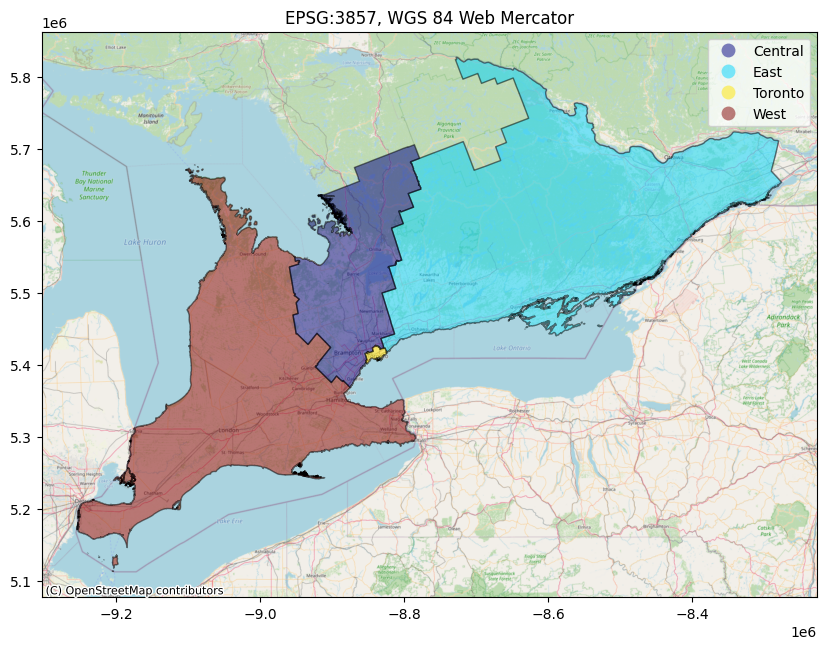

In [18]:
ontario = ontario.to_crs(epsg=3857) 
ax2=ontario.plot(cmap='jet', edgecolor='black', column='REGION', alpha=0.5, legend=True, figsize=(10,10))
ax2.set_title("EPSG:3857, WGS 84 Web Mercator")
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)

## Geospatial Data Visualization 

There are <b>many</b> libraries for visualization, but we are mainly using [folium](https://python-visualization.github.io/folium/) and [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/). Both of them are just wrappers around [leaflet.js](https://github.com/Leaflet/Leaflet), which is the go-to library for any kind of map visualization in almost all web and mobile applications.

Both of `ipyleaflet` and `folium` were created to serve the same purpose, and you don't need to dwell so much on how to use them if you don't want to, as we have provided wrappers around them in  `utilities/utils/viz.py`. This contains two functions: one for drawing a map with our graph overlaid on it, and and the other function is for drawing a route between two places/nodes with markers marking the source and destination. At the very least, you should be able to recognize the differences between the two wrappers. `folium` is much more lightweight than `ipyleaflet`, but on the other hand `ipyleaflet` has more options and very niche capabitilies. `ipyleaflet` doesn't work on Google Colab, unlike `folium`; see [googlecolab/colabtools#60](https://github.com/googlecolab/colabtools/issues/60) for more details. 

There are other visualization libraries that you should be aware of: 

* [hvplot](https://hvplot.holoviz.org/user_guide/Geographic_Data.html), if you want to get going through your analysis with geopandas and dataframes and all that. You should be aware of the significance of working with vanilla [GeoPandas](https://geopandas.org/), and that `osmnx` [supports that](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.projection) and yields two dataframes: one for all your nodes and one for all the edges.

* [mplleaflet](https://github.com/jwass/mplleaflet), which is another `leaflet`-based library, but it plays really nicely with `matplotlib`.

* [deck.gl](https://deck.gl/)

* [kepler.gl](https://kepler.gl/)

* [Google Data Studio](https://datastudio.google.com/)


## Visualization using folium

In [ ]:
# !pip install folium

In [19]:
import geopandas as gpd
import folium

ontario = ontario.to_crs(epsg=4326)

# Set starting location, initial zoom, and base layer source.
m = folium.Map(location=[43.67621,-79.40530],zoom_start=7, tiles='cartodbpositron', scrollWheelZoom=False, dragging=True)

for index, row in ontario.iterrows():
    # Simplify each region's polygon as intricate details are unnecessary
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, name=row['REGION'],style_function=lambda x: {'fillColor': 'black'})
    folium.Popup(row['REGION']).add_to(geo_j)
    geo_j.add_to(m)

m

## Visualization types in folium

In [20]:
import geopandas as gpd
import pandas

# Import polygons for Canadian provinces and concatenate to traffic statistics
# Define the raw URL
url_1 = "https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/05766c64c5e83dcd6788cc4415b462e2f82e0ccf/Appendix%20B/data/CanadaTraffic/canada.geojson"
url_2 = "https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/05766c64c5e83dcd6788cc4415b462e2f82e0ccf/Appendix%20B/data/CanadaTraffic/Canada_traffic.csv"

# Read the GeoJSON into a GeoDataFrame
canada = gpd.read_file(url_1)
traffic_accidents = pandas.read_csv(url_2)

dataset = pandas.concat([canada,traffic_accidents],axis=1).reindex(canada.index)
dataset =dataset.drop(columns=['Province','created_at','updated_at'])

In [22]:
dataset.head(5)

name  cartodb_id  \
0                     Quebec           1   
1  Newfoundland and Labrador           5   
2           British Columbia           6   
3                    Nunavut          12   
4      Northwest Territories          13   

                                            geometry  \
0  MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ...   
1  MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ...   
2  MULTIPOLYGON (((-131.07710 52.15009, -130.9481...   
3  MULTIPOLYGON (((-109.97841 78.67106, -109.4053...   
4  MULTIPOLYGON (((-110.39440 78.75221, -109.9784...   

   Fatalities per 100,000 population  Injuries per 100,000 population  \
0                                4.3                            418.9   
1                                7.4                            517.0   
2                                5.6                            393.4   
3                                5.2                             65.1   
4                                4.5                            224.5   

   Fatalities per Billion vehicles-kilometres  \
0                                         4.5   
1                                         7.2   
2                                         6.9   
3                                        48.8   
4                                         4.7   

   Injuries per Billion vehicles-kilometres  \
0                                     444.1   
1                                     498.9   
2                                     477.5   
3                                     609.8   
4                                     235.8   

   Fatalities per 100,000 licensed drivers  \
0                                      6.4   
1                                      6.6   
2                                      8.0   
3                                     74.2   
4                                      7.6   

  Injuries per 100,000 licensed drivers  
0                                 622.1  
1                                 460.8  
2                                 555.7  
3                                   928  
4                                 382.5

## Chloropleth Map
There are various ways to visualize geospatial data on a map. Below are a few examples of some common visualization types.

For the example in this section, data will be sourced from <a href="https://tc.canada.ca/en/road-transportation/statistics-data/canadian-motor-vehicle-traffic-collision-statistics-2018" target="new"> Statistics Canada’s dataset for Motor Vehicle Collisions in 2018</a>.

In [23]:
m = folium.Map(location=[58.4052172,-109.6062729],zoom_start=3, scrollWheelZoom=False, dragging=True)

# Setup binning for legend
bins = list(dataset['Injuries per 100,000 population'].quantile([0,0.25,0.5,0.75,1]))

# Main map init
folium.Choropleth(
    geo_data=dataset,
    name='chloropleth',
    data=dataset,
    columns=['name','Injuries per 100,000 population'],
    key_on='feature.properties.name',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Injuries per 100,000 population',
    bins=bins,
    reset=True
).add_to(m)
folium.LayerControl().add_to(m)

# Tooltip styling
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

# Tooltip
NIL = folium.features.GeoJson(
    dataset,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name','Fatalities per 100,000 population','Injuries per 100,000 population','Fatalities per Billion vehicles-kilometres','Injuries per Billion vehicles-kilometres','Fatalities per 100,000 licensed drivers','Injuries per 100,000 licensed drivers'],
        aliases=['Province','Fatalities per 100,000 population','Injuries per 100,000 population','Fatalities per Billion vehicles-kilometres','Injuries per Billion vehicles-kilometres','Fatalities per 100,000 licensed drivers','Injuries per 100,000 licensed drivers'],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(NIL)
m.keep_in_front(NIL)
m

## Cartogram Map
Cartogram maps distort the area or distance scale of a map to reflect a chosen variable. In this case, we can distort the area of each individual province to scale to its share of motor vehicle injuries in 2018.

In [ ]:
# !pip install geoplot

<GeoAxesSubplot: >

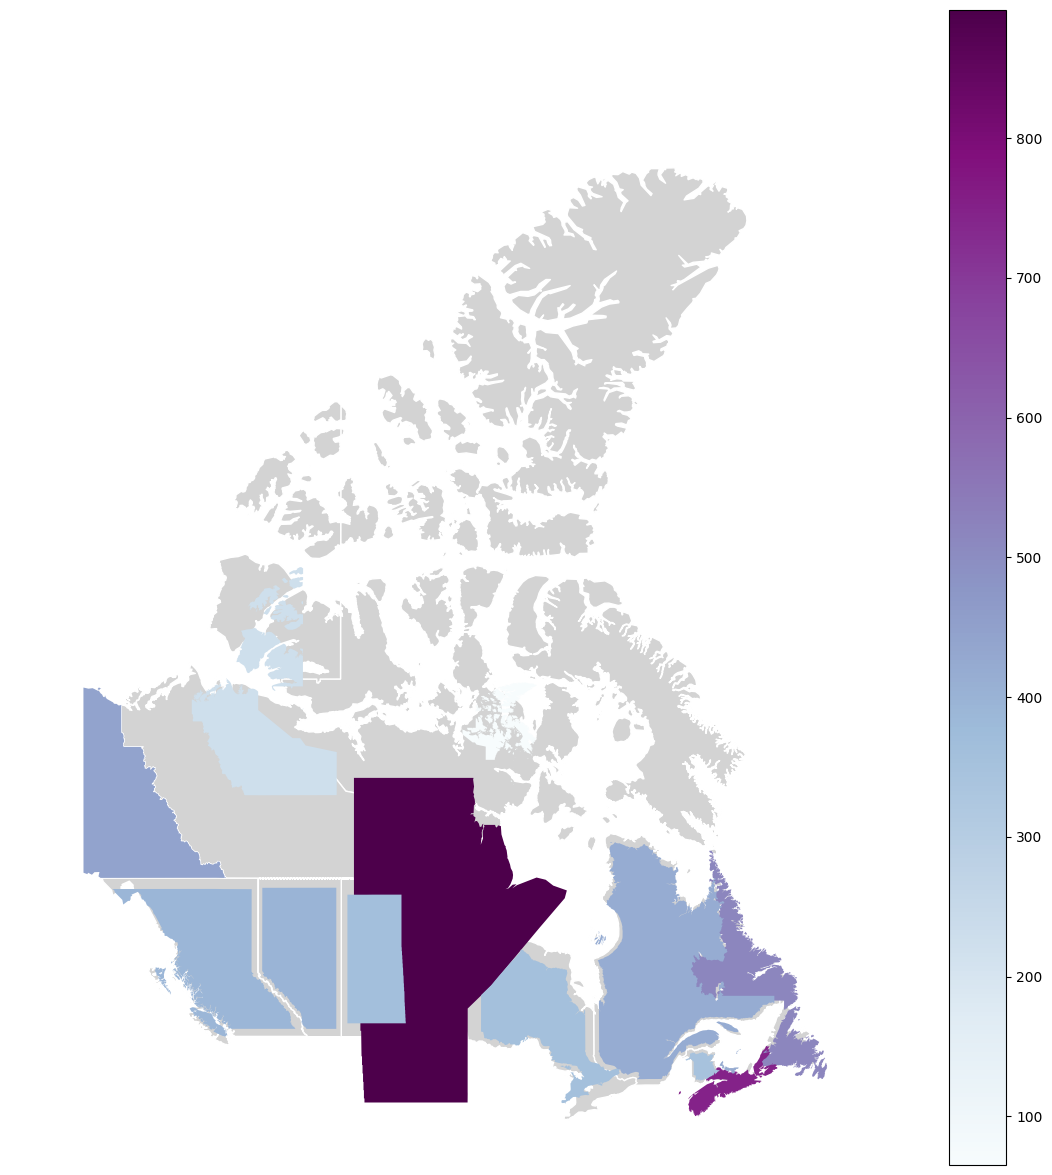

In [24]:
import geoplot


ax = geoplot.cartogram(
    dataset,
    scale='Injuries per 100,000 population', 
    legend=True,
    hue='Injuries per 100,000 population',
    legend_var='hue',
    cmap='BuPu',
    limits=(0.15,2),
    projection=geoplot.crs.WebMercator(),
    figsize=(15,15))
geoplot.polyplot(dataset, facecolor='lightgray', edgecolor='white', ax=ax)

In this cartogram map, we can see that Manitoba has a disproportionate share of the motor vehicle injuries.

## Bubble Map
Bubble maps show properties of the points being visualized through colour and size variations. In the example below, we vary Marker size by the Injuries per 100,000 population, while we colour provinces in blue and territories in red.

In [25]:
territories = ['Yukon Territory','Nunavut','Northwest Territories']

m = folium.Map(location=[58.4052172,-109.6062729],zoom_start=3, scrollWheelZoom=False, dragging=True)

for i,r in dataset.iterrows():
    folium.Circle(
        location=[r['geometry'].centroid.y,r['geometry'].centroid.x],
        radius = float(r['Injuries per 100,000 population'])*500,
        fill=True,
        popup=f"{r['name']}: {r['Injuries per 100,000 population']}",
        color = 'blue' if r['name'] not in territories else 'crimson'
        ).add_to(m)
m

## Hexagonal Binning

Hexagonal binning is a kind of aggregate visualization method where hexagons are drawn over the map, with each hexagon summarizing/abstracting the data that it contains.

The example below uses traffic accident data for Toronto, retrieved from the [Toronto Police Service’s Public Safety Data Portal](https://data.torontopolice.on.ca/pages/ksi). 

In [ ]:
# !pip install plotly

In [26]:
import plotly.figure_factory as ff

# Import polygons for Canadian provinces and concatenate to traffic statistics
# Define the raw URL
url = "https://raw.githubusercontent.com/Optimization-Algorithms-Book/Code-Listings/05766c64c5e83dcd6788cc4415b462e2f82e0ccf/Appendix%20B/data/Police/KSI.geojson"

# Read the GeoJSON into a GeoDataFrame
ksi = gpd.read_file(url)

fig = ff.create_hexbin_mapbox(
    data_frame=ksi,
    lat="LATITUDE",
    lon="LONGITUDE",
    nx_hexagon=15,
    opacity=0.5,
    min_count=1,
    labels={'color':'Reported Accidents'},
    color_continuous_scale='turbo'
    )

fig.update_layout(mapbox_style="open-street-map")
fig.show()

## Heat Map
Heat maps use a colour gradient to represent increasing density in data. As the underlying data points increases in density, so does the intensity (or shade) of the heatmap colour. Below is an example using the same Toronto traffic data from before.

In [28]:
import plotly.express as px

fig = px.density_mapbox(
    data_frame=ksi,
    lat="LATITUDE", 
    lon="LONGITUDE",
    mapbox_style='open-street-map',
    radius=1,
    zoom=9,
)
fig.update_layout(coloraxis_showscale=False, hovermode=False)

## Cluster Map
Cluster maps aggregate data by merging neighouring points into one larger “cluster”. This generally improves performance when rendering larger datasets, and provides an easy-to-access indicator of density.

In [29]:
from folium.plugins import FastMarkerCluster
m = folium.Map(location=[43.6532,-79.3832], zoom_start=10, scrollWheelZoom=False, dragging=True)
FastMarkerCluster([[r.LATITUDE,r.LONGITUDE] for r in ksi.itertuples()]).add_to(m)

m

## Interactive mapping with leafmap

In [3]:
# !pip install leafmap

In [7]:
import leafmap

m = leafmap.Map(center=[43.6532, -79.3832], zoom=8)  # City of Toronto as the center of the map
m

Map(center=[43.6532, -79.3832], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

## Geospatial Data Analysis

### shapely

[Shapely](https://pypi.org/project/Shapely/) is a BSD-licensed Python package for manipulation and analysis of planar geometric objects. It provides us with datatypes to represent geometric objects that geopandas exploits to represent spatial data.

### PySAL

[PySAL](https://pysal.org/) or Python Spatial Analysis Library is an open source cross-platform library for geospatial data science with an emphasis on geospatial vector data written in Python. 

### GeoDa

[GeoDa](https://geodacenter.github.io/) is a free and open source software tool that serves as an introduction to spatial data science. It is designed to facilitate new insights from data analysis by exploring and modeling spatial patterns.

## Geocoding

### GeoPy

[GeoPy](https://geopy.readthedocs.io/en/stable/#)  is a Python client for several popular geocoding web services.


### nominatim

[nominatim](https://geopy.readthedocs.io/en/stable/#nominatim) is used to look up a location from a textual description (the official website description). This is called geocoding and decoding, which is translating address of a location to its coordinates (and vice-versa).

### Photon Geocoder

[photon](https://github.com/komoot/photon) is an open source geocoder built for OpenStreetMap data.

### Other geocoders

[Open Data and Open Source Geocoders](https://blog.batchgeo.com/open-data-open-source-geocoders/)


## Routing Libraries 

### osrm

For some problems, determining the route between multiple points is not the main focus, and it is acceptable to use a pre-generated route. [OSRM](http://project-osrm.org/) does exactly that; it is a routing engine with an API that you feed with coordinates, and in return it gives you the fastest route between them. It has other useful capabilities like doing Travelling Salesman and solving all pairs shortest path.

### Valhalla

[Valhalla](https://valhalla.readthedocs.io/en/latest/)'s routing service (a.k.a. turn-by-turn), is an open-source routing service that lets you integrate routing and navigation into a web or mobile application.

### Openrouteservice

The [openrouteservice - ORS](https://openrouteservice.org/) provides global spatial services by consuming user-generated and collaboratively collected free geographic data directly from OpenStreetMap. It is highly customizable, performant and written in Java.

### Routing

Geofabrik operates a [routing service](https://www.geofabrik.de/data/routing.html) based on [OSRM](http://project-osrm.org/). OSRM makes use of state-of-the-art routing algorithms and can compute routes across Europe within milliseconds. The engine supports the following features: via points, turn restrictions and turn maneuvers.


#### Other libraries

* [Geopy](https://github.com/geopy/geopy)
* [Geojson](https://github.com/jazzband/geojson)
* [Pyproj](https://lnkd.in/dNG9fdkm)
* [ArcGIS](https://developers.arcgis.com/python/)
* [Cartopy](https://github.com/SciTools/cartopy)
* [Gevent](http://www.gevent.org)
* [Fiona](https://fiona.readthedocs.io/en/stable/)
* [H3](https://h3geo.org/docs/)
* [KeplerGL](https://kepler.gl/)
* [Gdal](https://gdal.org/api/python_bindings.html)
* [PyQGIS](https://docs.qgis.org/3.22/en/docs/pyqgis_developer_cookbook/index.html)
* [Pydec](https://github.com/visgl/deck.gl/tree/master/bindings/pydeck)
* [PyGMT](https://www.pygmt.org)
* [Pyrosm](https://pyproj4.github.io/pyproj/stable/)
* [RTree](https://github.com/Toblerity/rtree)
* [Scikit-mobility](https://scikit-mobility.github.io/scikit-mobility/)
* [Rasterio](https://rasterio.readthedocs.io/en/stable/)
* [Openrouteservice](https://openrouteservice.org/)
* [Open3D](http://www.open3d.org/)

#### Projects

* [AI for Smart Mobility](https://medium.com/ai4sm)
* [Interactive Operations Research](https://interactive-or.com/)